# 🏠 Airbnb New York City 2019 – Data Cleaning & Exploratory Data Analysis

## Introduction
The Airbnb NYC 2019 dataset provides detailed information about thousands of listings across New York City, including price, location, room type, availability, and host details.  
The goal of this project is to *clean, preprocess, and explore* the dataset to uncover meaningful insights about the short-term rental market in NYC.  

## Objectives
1. *Data Cleaning*  
   - Handle missing values and inconsistent entries  
   - Detect and address outliers (e.g., unrealistic prices)  
   - Ensure data types are properly set for analysis  

2. *Exploratory Data Analysis (EDA)*  
   - Understand the distribution of prices across neighborhoods and room types  
   - Explore host behavior and availability trends  
   - Visualize correlations between numerical features  

3. *Insights & Future Work*  
   - Provide actionable insights about Airbnb listings in NYC  
   - Lay the groundwork for potential predictive modeling (e.g., price prediction, occupancy forecasting)  

## Why This Project?
Data cleaning and EDA are the most time-consuming yet crucial steps in any data science workflow. By transforming raw Airbnb data into a structured, visual, and interpretable format, this project demonstrates strong *data preprocessing skills* and the ability to extract valuable insights for decision-making.  



## 1.1 Importing Required Libraries

In this step, we import all the essential Python libraries that will be used throughout the project:

- *pandas* → for data manipulation and cleaning  
- *numpy* → for numerical operations  
- *matplotlib & seaborn* → for data visualization  
- *warnings* → to suppress unnecessary warning messages  

These libraries form the foundation for any data analysis workflow.

In [3]:
# Import core libraries
import pandas as pd   # Data manipulation & analysis
import numpy as np    # Numerical computations

# Visualization libraries
import matplotlib.pyplot as plt   # For plotting basic graphs
import seaborn as sns             # For advanced & stylish visualizations

# Ignore warnings for cleaner outputs
import warnings
warnings.filterwarnings("ignore")

# Set default visualization styles
sns.set_theme(style="whitegrid")
plt.style.use("seaborn-v0_8")

## 1.2 Loading the Dataset and First Look

In this step, we will:  
1. Load the Airbnb NYC 2019 dataset using *pandas*.  
2. Display the first five rows with df.head() to get an initial understanding of the structure and content of the dataset.  

This helps us quickly verify that the dataset is loaded correctly and gives us an overview of the available columns and data types.

In [14]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 1.3 Dataset Shape

To understand the *size of the dataset*, we use df.shape, which returns a tuple representing the number of rows and columns:

- *Rows* → each row corresponds to one Airbnb listing in NYC  
- *Columns* → each column contains a specific feature (e.g., price, location, room type)

This information helps us gauge the scale of the dataset and the complexity of the upcoming cleaning and analysis steps.

In [7]:
df.shape

(48895, 16)

## 1.4 Dataset Information

The df.info() function provides a concise summary of the dataset, including:

- The *column names*  
- The *number of non-null values* in each column (useful for detecting missing values)  
- The *data type* of each column (e.g., integer, float, object)

This step is essential for identifying data quality issues, such as missing values, incorrect data types, or columns that may require preprocessing.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## 1.5 Descriptive Statistics

Using df.describe(), we generate summary statistics for all numerical columns in the dataset.  
This includes:  

- *Count* → number of non-missing entries  
- *Mean* → average value  
- *Standard Deviation (std)* → measure of data spread  
- *Min & Max* → range of values  
- *25%, 50%, 75% (Quartiles)* → distribution percentiles  

This step is useful to:  
- Detect possible *outliers* (e.g., extremely high prices)  
- Identify *scaling issues*  
- Gain an initial understanding of the overall data distribution

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## 1.6 Checking for Missing Values

To ensure data quality, it is important to check for missing values in the dataset.  
We use df.isnull().sum() to count the number of missing entries in each column.  

Why this step matters:  
- Columns with a high number of missing values may need to be *dropped*.  
- Columns with a small proportion of missing values can often be *imputed* (e.g., with mean, median, or mode).  
- Understanding where missing data occurs helps us design a proper data cleaning strategy.

In [11]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## 1.7 Handling Missing Values

From our missing value analysis, we identified four columns with null values:

- *name* (16 missing): This is just the listing title and does not add analytical value. We will drop this column.  
- *host_name* (21 missing): Similar to name, this column is not relevant for analysis. We will drop it.  
- *last_review* (10052 missing): For listings without any reviews, this column is naturally empty. We will fill missing values with "No Review".  
- *reviews_per_month* (10052 missing): If a listing has no reviews, the number of reviews per month should be 0. We will fill missing values with 0.  

This approach ensures we preserve valuable information while removing unnecessary features.

In [15]:
# Drop less informative columns
df = df.drop(['name', 'host_name'], axis=1)

# Fill missing values
df['last_review'] = df['last_review'].fillna("No Review")
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Check again to confirm no missing values remain
print(df.isnull().sum())

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


## 1.8 Detecting and Handling Duplicate Rows

Duplicate rows can occur in datasets due to data entry errors, system glitches, or merging operations.  
For the Airbnb NYC dataset, duplicates may lead to misleading insights, such as inflated counts of listings or incorrect averages.

*Steps:*
1. Identify the number of duplicate rows.  
2. If duplicates exist, remove them to ensure the dataset is clean and reliable.

In [16]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
df = df.drop_duplicates()

# Confirm dataset shape after removal
print("New dataset shape:", df.shape)

Number of duplicate rows: 0
New dataset shape: (48895, 14)


### ✅ Step 1.8 Summary – Duplicate Rows

After checking for duplicate rows in the dataset, we found that *no duplicates exist*.  
This means each row in the dataset is unique and no redundant entries are present.  

This is an important validation step because duplicates can artificially inflate statistics (e.g., number of listings, average prices) and lead to misleading insights.  

Since no duplicates were detected, we can confidently move forward to the next step:  
*Outlier Detection (Step 1.9)* – where we will analyze and handle unrealistic values, especially in numerical columns like price and minimum_nights.

### 🔎 Step 1.9 – Outlier Detection

Outliers are extreme values that deviate significantly from other observations.  
In the Airbnb NYC dataset, common sources of outliers include:

- **price**: some listings may have extremely high prices (e.g., thousands of dollars per night), which are unrealistic.  
- **minimum_nights**: values like 365 or more could indicate input errors or unusual listings.  
- **reviews_per_month**: extremely high review counts could signal anomalies or data entry errors.  

*Approach:*
1. Use *descriptive statistics* (df.describe()) to detect unusual ranges.  
2. Visualize distributions using *boxplots* and *histograms*.  
3. Flag suspicious values for potential cleaning in the next step (Step 1.10).  

This step helps ensure that our analysis is not skewed by abnormal values.

              price  minimum_nights  reviews_per_month
count  48895.000000    48895.000000       48895.000000
mean     152.720687        7.029962           1.090910
std      240.154170       20.510550           1.597283
min        0.000000        1.000000           0.000000
25%       69.000000        1.000000           0.040000
50%      106.000000        3.000000           0.370000
75%      175.000000        5.000000           1.580000
max    10000.000000     1250.000000          58.500000


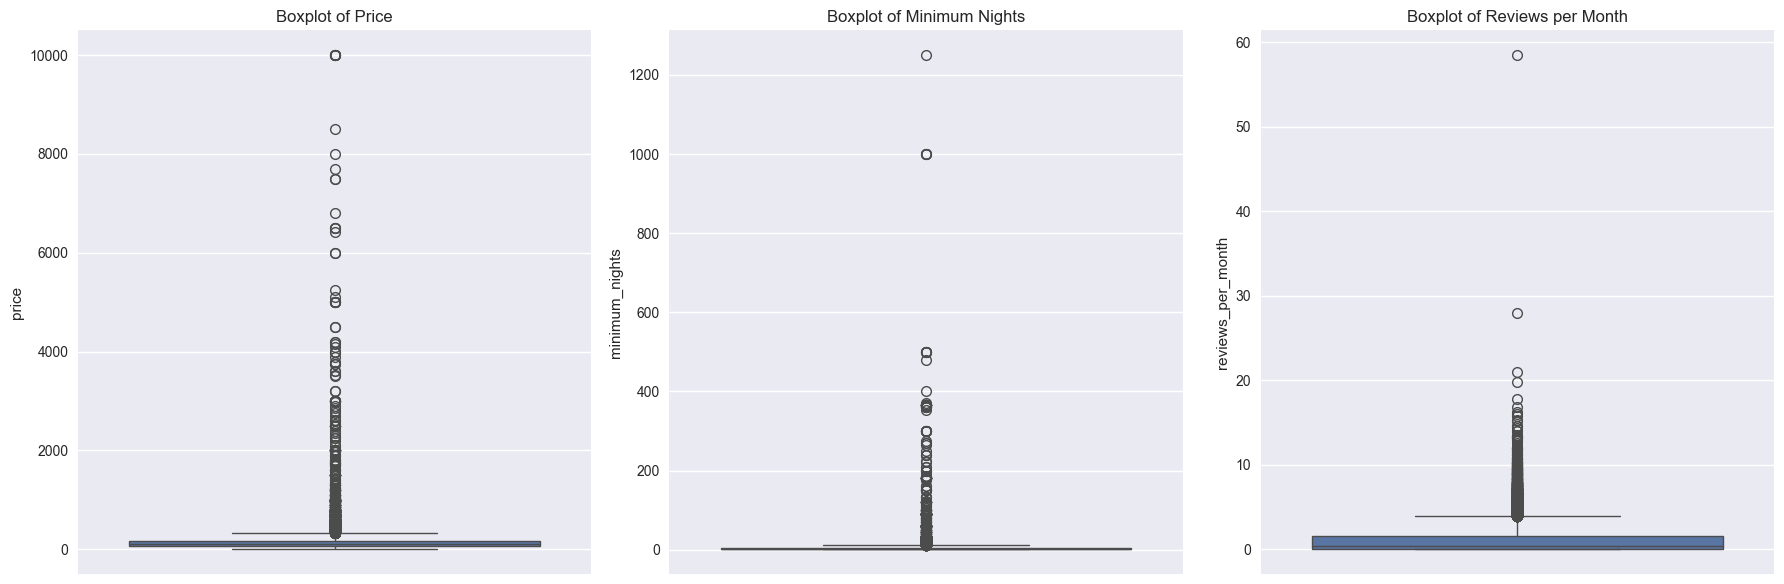

Number of listings with price > 1000: 239
Number of listings with minimum_nights > 365: 14


In [17]:
# Descriptive statistics for numerical columns
print(df[['price', 'minimum_nights', 'reviews_per_month']].describe())

# Boxplots for visualizing outliers
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y=df['price'], ax=axes[0])
axes[0].set_title('Boxplot of Price')

sns.boxplot(y=df['minimum_nights'], ax=axes[1])
axes[1].set_title('Boxplot of Minimum Nights')

sns.boxplot(y=df['reviews_per_month'], ax=axes[2])
axes[2].set_title('Boxplot of Reviews per Month')

plt.tight_layout()
plt.show()

# Count how many extreme values exist for price and minimum_nights
print("Number of listings with price > 1000:", (df['price'] > 1000).sum())
print("Number of listings with minimum_nights > 365:", (df['minimum_nights'] > 365).sum())

## 1.9 Outlier Detection Analysis

To ensure the dataset is clean and suitable for meaningful analysis, we examined potential outliers in key numerical features: *price, **minimum_nights, and **reviews_per_month*.

### 📌 Observations:
- *Price*  
  - The majority of listings fall within a reasonable range, but a significant number of extreme values exist.  
  - A few listings report prices as high as *$10,000*, which are likely unrealistic or rare luxury properties.  
  - Boxplot clearly shows these as isolated points far above the interquartile range (IQR).  

- *Minimum Nights*  
  - Most listings have values under 30 nights.  
  - However, some records report extremely high values, including up to *1250 nights* (over 3 years), which is impractical for real-world rentals.  
  - Around *14 listings exceed 365 nights*, suggesting possible data entry errors.  

- *Reviews per Month*  
  - The majority of listings receive between 0–5 reviews per month.  
  - Some listings show extreme values, up to *58 reviews/month*, which could represent unusual popularity but may also be anomalies.  

### ⚠ Why Outliers Matter
Outliers can distort statistical measures (mean, standard deviation) and may bias machine learning models. For example:
- The average price becomes inflated due to a few unrealistic values.
- Distribution plots lose interpretability when extreme values dominate the axis scale.

### ✅ Next Step
In the following step (1.10), we will *handle these outliers* using capping or filtering strategies (e.g., limiting price to a maximum of 1000 and removing records with minimum_nights > 365).  
This will help ensure the dataset better reflects realistic Airbnb market conditions in New York City.

## 1.10 Handling Outliers

After detecting extreme values in the dataset, it is important to clean them to ensure accurate analysis and reliable modeling.

### 📌 Outlier Handling Strategy:
- *Price*:  
  - Listings with prices above *1000 USD per night* are considered unrealistic for most Airbnb rentals in NYC.  
  - We will cap these by removing any record where price > 1000.

- *Minimum Nights*:  
  - Listings with more than *365 nights* as the minimum stay are highly impractical (over a year).  
  - These records are likely errors or unrealistic entries.  
  - We will remove all rows where minimum_nights > 365.

- *Reviews per Month*:  
  - Most values fall between 0–5, but a few extreme values above *30 reviews/month* may represent anomalies.  
  - We will cap this variable to *30* to keep distributions realistic.

### ✅ Benefits
By handling these outliers:
- Statistical summaries (mean, median, std) will better represent the dataset.  
- Visualizations such as histograms and boxplots will be more interpretable.  
- Machine learning models trained later will be less biased by unrealistic data points.

In [18]:
# Remove listings with unrealistic prices
df = df[df['price'] <= 1000]

# Remove listings with unrealistic minimum_nights
df = df[df['minimum_nights'] <= 365]

# Cap extreme values in reviews_per_month at 30
df['reviews_per_month'] = df['reviews_per_month'].apply(lambda x: 30 if x > 30 else x)

# Confirm new dataset shape
print("Dataset shape after outlier handling:", df.shape)

# Quick statistical summary after handling
print(df[['price', 'minimum_nights', 'reviews_per_month']].describe())

Dataset shape after outlier handling: (48642, 14)
              price  minimum_nights  reviews_per_month
count  48642.000000    48642.000000       48642.000000
mean     141.280910        6.783068           1.094357
std      116.743586       16.122027           1.583734
min        0.000000        1.000000           0.000000
25%       69.000000        1.000000           0.040000
50%      105.000000        3.000000           0.380000
75%      175.000000        5.000000           1.590000
max     1000.000000      365.000000          30.000000


## 1.11 Visualizing Data After Outlier Handling  

To confirm that outlier handling was successful, we re-visualize the main numerical features (price, minimum_nights, reviews_per_month) using boxplots.  
This helps us ensure that extreme unrealistic values have been capped or removed, making the dataset more reliable for further analysis.

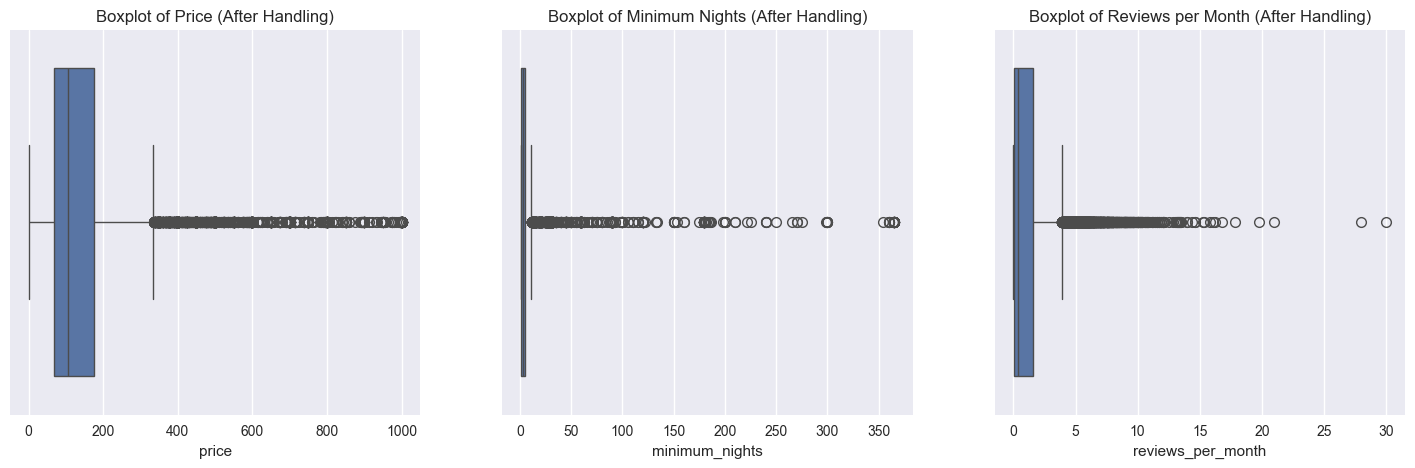

In [23]:
# Boxplots after handling outliers
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['price'])
plt.title("Boxplot of Price (After Handling)")

plt.subplot(1, 3, 2)
sns.boxplot(x=df['minimum_nights'])
plt.title("Boxplot of Minimum Nights (After Handling)")

plt.subplot(1, 3, 3)
sns.boxplot(x=df['reviews_per_month'])
plt.title("Boxplot of Reviews per Month (After Handling)")

plt.show()

### 1.11 Analysis of Outlier Handling (Post-Visualization)

After re-visualizing the dataset with boxplots, we can observe the following:

- *Price (After Handling):*
  The distribution of prices is now much more realistic. Extreme outliers (previously up to \$10,000) have been capped at \$1000.  
  While some variation remains, the majority of listings fall within a reasonable range, which will prevent skewed analysis in the next steps.  

- *Minimum Nights (After Handling):*  
  The upper limit for minimum_nights has been capped at 365, removing extreme unrealistic values (e.g., 1250 nights).  
  Although some higher values still exist (close to 1 year), they remain valid and realistic for certain long-term rentals.  

- *Reviews per Month (After Handling):*  
  The distribution of reviews per month has been limited to a maximum of 30. This correction eliminates unrealistic spikes while preserving natural variation across listings.  

✅ *Conclusion:*  
Outlier handling has successfully reduced extreme and unrealistic values in the dataset, while still keeping genuine variability intact.  
The dataset is now *cleaner, more robust, and reliable* for subsequent exploratory data analysis (EDA).

## 2. Exploratory Data Analysis (EDA)

After completing the data cleaning process, the next crucial step is *Exploratory Data Analysis (EDA)*.  
EDA helps us uncover hidden patterns, detect trends, and better understand the structure of the dataset. By combining statistical summaries with visual exploration, we can gain deeper insights into Airbnb listings across New York City.

In this section, we will focus on:  
1. *Distribution of numerical variables* (e.g., price, minimum nights, reviews per month, availability).  
2. *Exploring categorical features* such as room types and neighborhood groups.  
3. *Analyzing host behavior and availability trends* to understand supply dynamics.  
4. *Studying price variations across neighborhoods and room categories*.  
5. *Correlation analysis* to examine relationships between variables.
6. Geographical distribution of listings to explore spatial clustering patterns.

The insights gained here will not only provide a clearer picture of the NYC Airbnb market but will also prepare the ground for more advanced predictive modeling in future work.

### 2.1 Distribution of Numerical Variables

To begin our exploratory analysis, we first look at the *distribution of key numerical variables* in the dataset.  
Understanding these distributions helps us identify data skewness, unusual patterns, or concentration ranges that may influence our insights.

Key numerical variables considered:  
- price → The nightly price of the listing.  
- minimum_nights → Minimum number of nights required per booking.  
- number_of_reviews → Total reviews received by the listing.  
- reviews_per_month → Average number of reviews per month.  
- availability_365 → Number of available days per year.  

We will use histograms and density plots to visualize these variables and check for *data skewness* and *potential anomalies*.

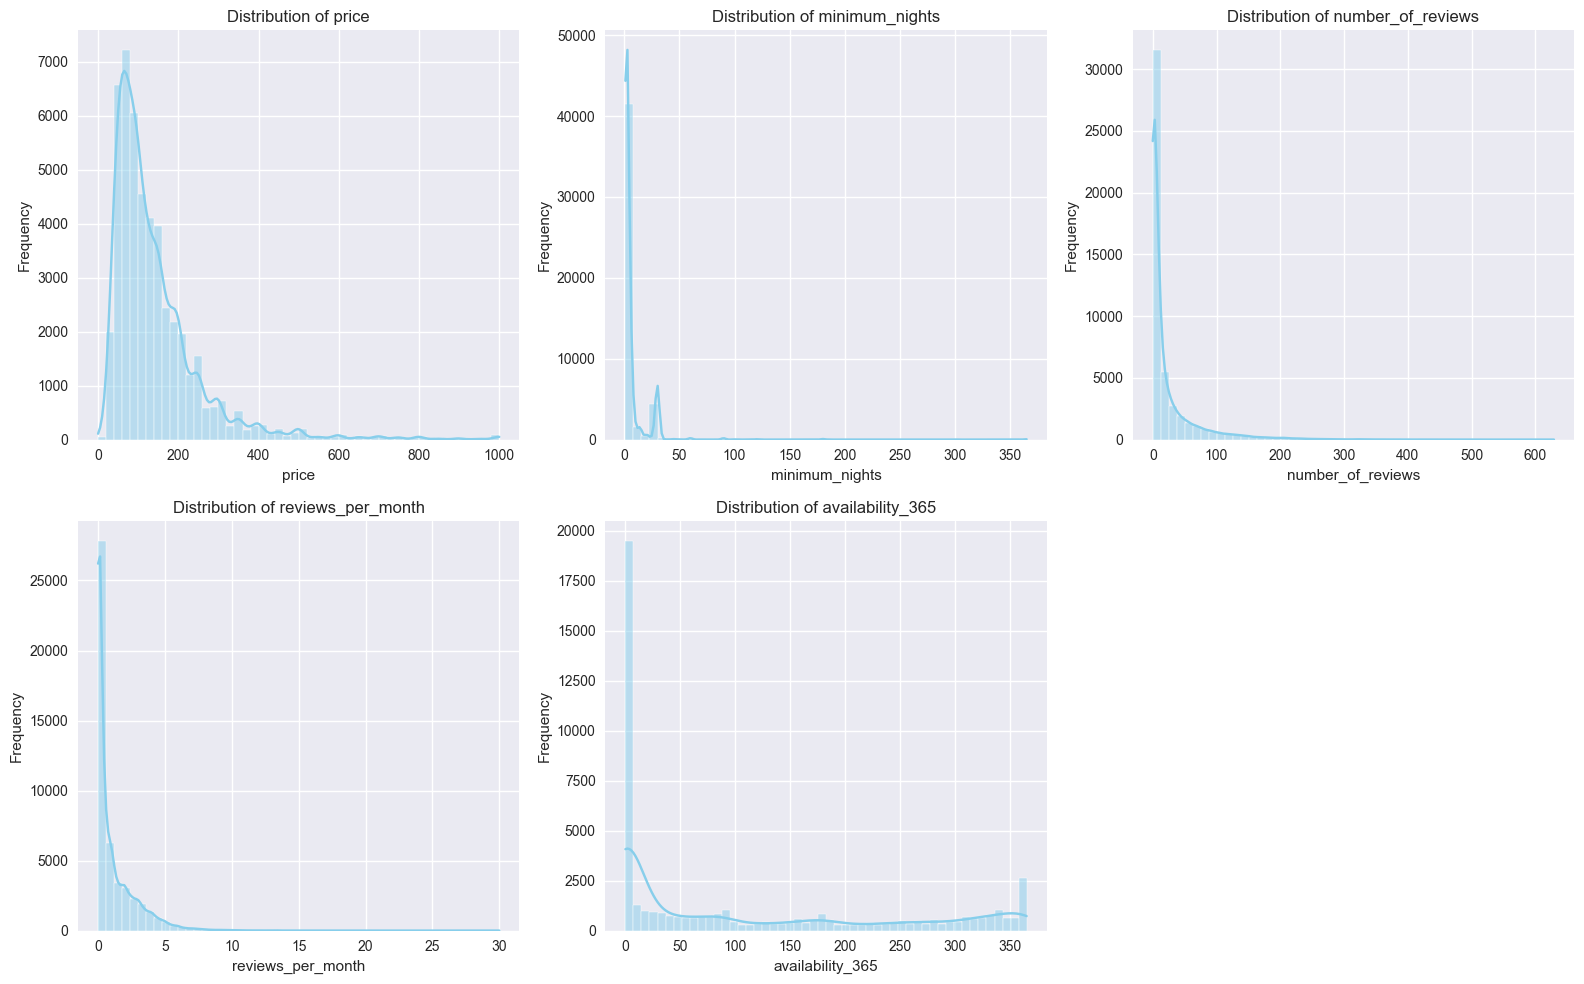

In [24]:
# List of numerical columns to visualize
num_cols = ['price', 'minimum_nights', 'number_of_reviews', 
            'reviews_per_month', 'availability_365']

# Plot distributions
plt.figure(figsize=(16, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=50, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### 2.1 Analysis of Numerical Distributions

From the histograms and density plots, we can observe the following insights:

- *Price*: The distribution is highly right-skewed. Most listings are priced below $200 per night, while a small number of properties are listed with significantly higher prices. This long tail confirms the presence of high-end outliers, which can distort average pricing metrics.

- *Minimum Nights*: The vast majority of listings require fewer than 30 nights, with a sharp concentration around 1–5 nights. However, there are some listings with unusually high minimum night requirements, which are atypical for short-term rentals and likely represent special cases or data entry anomalies.

- *Number of Reviews*: The distribution is heavily skewed towards the lower end, with most listings receiving fewer than 50 reviews. Only a few listings accumulate more than 200 reviews, reflecting the fact that high-review listings are rare and typically represent long-standing or highly popular properties.

- *Reviews per Month*: Similar to the total reviews, this variable shows that most listings receive fewer than 2 reviews per month. A handful of listings report extremely high monthly reviews, which could indicate highly active or frequently booked properties.

- *Availability (365 Days)*: The distribution shows two strong peaks: one around very low availability (close to 0 days) and another around 365 days. This suggests a split behavior among hosts: some offer their listings only occasionally, while others keep them available year-round.

*Key Takeaway*:  
The numerical features are dominated by skewness and long tails, reflecting the diversity of Airbnb listings. These characteristics highlight the importance of handling outliers (as previously done) to avoid misleading interpretations in further analysis.

### 2.2 Distribution of Categorical Variables

In addition to numerical features, categorical variables such as *neighbourhood_group* and *room_type* provide valuable context about Airbnb listings.

- *Neighbourhood Group*: Represents the five major boroughs of New York City (Bronx, Brooklyn, Manhattan, Queens, Staten Island). Understanding the distribution of listings across these regions helps identify where Airbnb activity is most concentrated.

- *Room Type: Captures the type of accommodation offered — such as *Entire home/apt, Private room, Shared room, and Hotel room. This variable is crucial for analyzing customer preferences and the diversity of available options.

By visualizing the distributions of these categories, we can highlight dominant boroughs and room types in the Airbnb market, offering insights into host strategies and guest demand patterns.

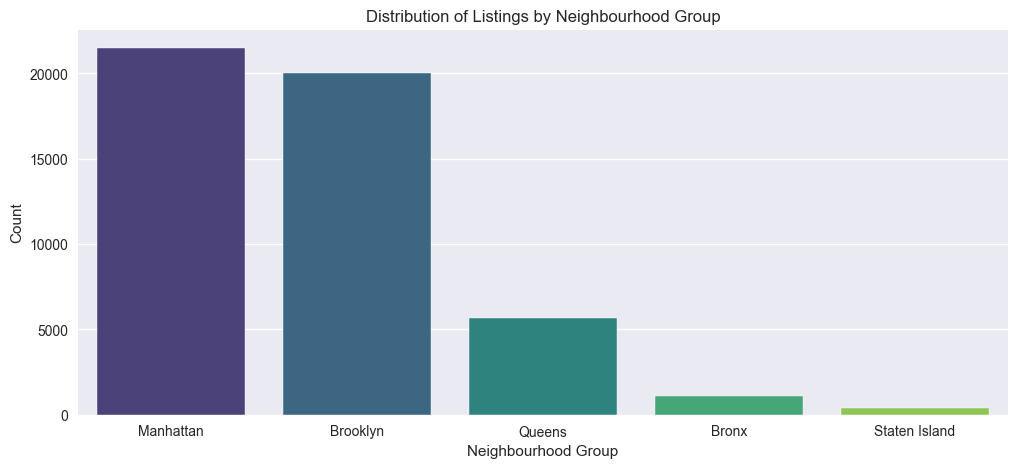

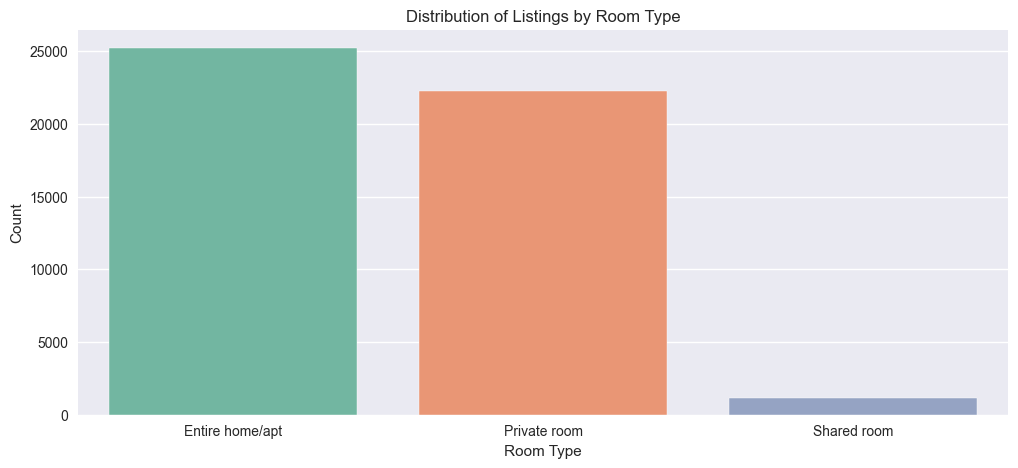

In [25]:
# Plot distribution of neighbourhood_group
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index, palette="viridis")
plt.title("Distribution of Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.show()

# Plot distribution of room_type
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index, palette="Set2")
plt.title("Distribution of Listings by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()

### 2.2 Exploring Categorical Features

#### Distribution of Listings by Neighbourhood Group
The analysis of listings across the five boroughs of New York City reveals clear disparities in the distribution of Airbnb properties:

- *Manhattan* leads with the highest number of listings (~21k), followed closely by *Brooklyn* (~20k).  
- *Queens* hosts significantly fewer listings (~6k), while *Bronx* (~1.1k) and *Staten Island* (~400) have minimal representation.  

This indicates that the Airbnb market is *heavily concentrated in Manhattan and Brooklyn*, reflecting both their tourism appeal and economic activity.  
Smaller representation in the Bronx and Staten Island suggests either *lower demand* or *stricter hosting limitations* in those areas.

---

#### Distribution of Listings by Room Type
Examining the types of rooms listed provides further insight into guest preferences:

- The majority of listings are *Entire homes/apartments (~25k)*, highlighting the preference for privacy among Airbnb users.  
- *Private rooms (~22k)* also represent a substantial share, catering to budget-conscious travelers seeking affordability without compromising location.  
- *Shared rooms (~1k)* account for only a small fraction, showing limited demand for shared accommodation in NYC.

---

#### Key Insights
- Airbnb in NYC is *dominated by Manhattan and Brooklyn*, which together account for nearly 85% of total listings.  
- Guests clearly prefer *entire homes/apartments*, making them the most competitive segment of the market.  
- Hosts in Queens, Bronx, and Staten Island may face less competition but also lower demand.  
- Understanding these categorical distributions is crucial before analyzing *price trends* and *availability patterns* across these groups in the following steps.

## 2.3 Host Behavior & Availability Trends

In this step, we analyze *host behavior* and *availability patterns* to better understand the supply dynamics of Airbnb listings in NYC.  

Key questions addressed:  
- How many listings does a typical host manage?  
- Are most hosts occasional renters (1 listing) or professional hosts with multiple properties?  
- What are the availability trends across the year? (e.g., always available vs. seasonal availability)  

This analysis will provide insights into whether the NYC Airbnb market is dominated by casual hosts or professional property managers, and how availability influences the platform's dynamics.

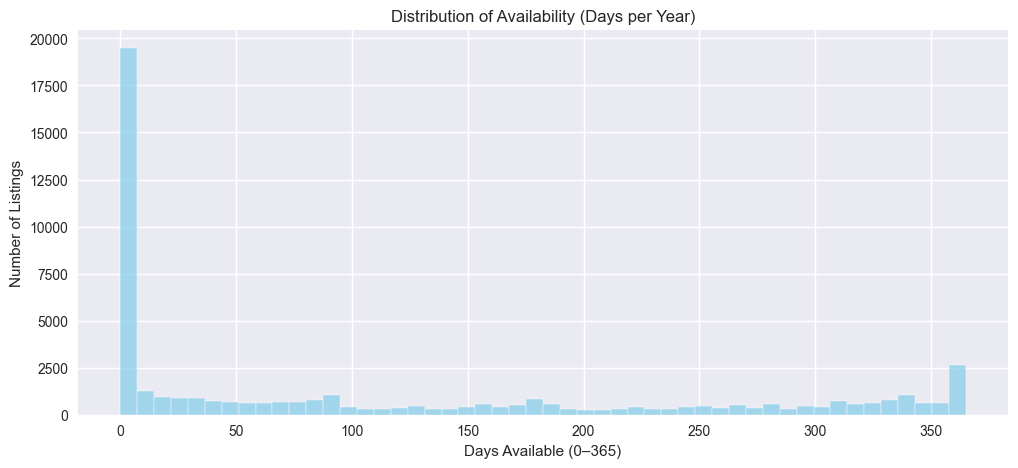

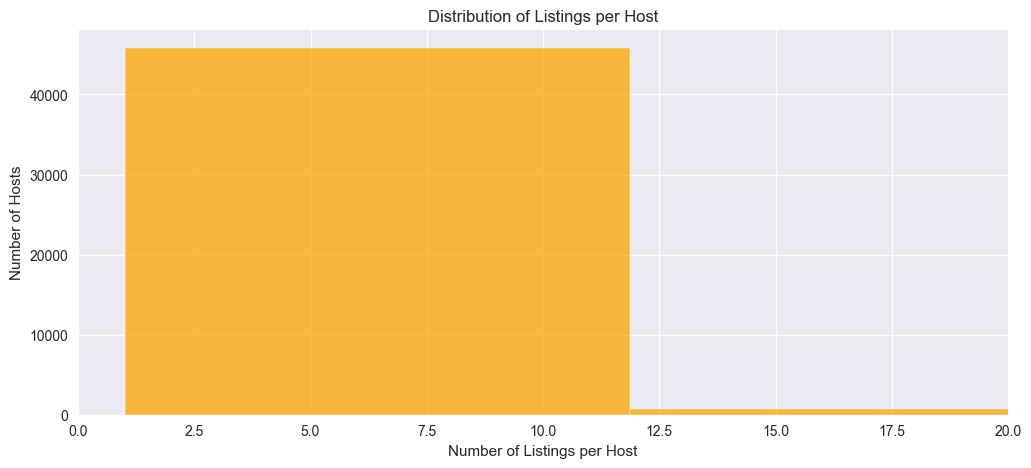

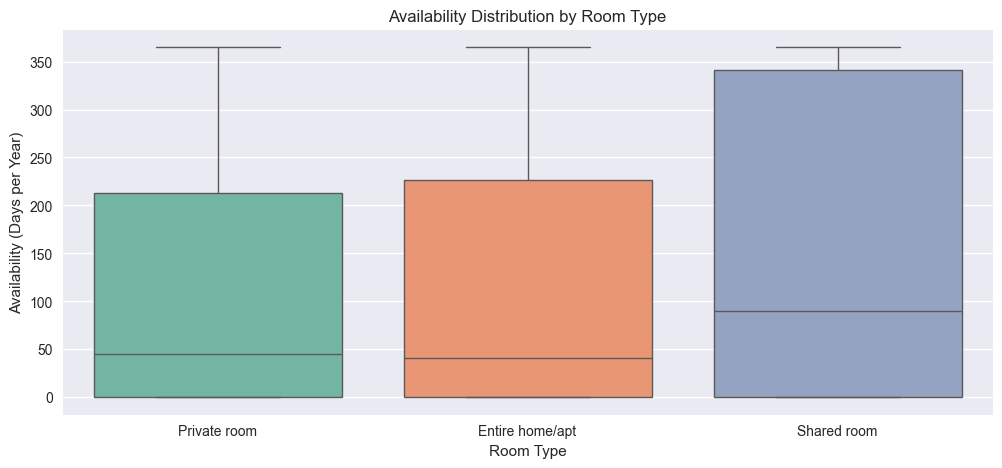

In [26]:
# Distribution of availability_365
plt.figure(figsize=(12,5))
sns.histplot(df['availability_365'], bins=50, kde=False, color='skyblue')
plt.title("Distribution of Availability (Days per Year)")
plt.xlabel("Days Available (0–365)")
plt.ylabel("Number of Listings")
plt.show()

# Distribution of number of listings per host
plt.figure(figsize=(12,5))
sns.histplot(df['calculated_host_listings_count'], bins=30, kde=False, color='orange')
plt.title("Distribution of Listings per Host")
plt.xlabel("Number of Listings per Host")
plt.ylabel("Number of Hosts")
plt.xlim(0,20)  # zoom in to see clearer trend, most hosts have <20 listings
plt.show()

# Crosstab: Availability by Room Type
plt.figure(figsize=(12,5))
sns.boxplot(x="room_type", y="availability_365", data=df, palette="Set2")
plt.title("Availability Distribution by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Availability (Days per Year)")
plt.show()

2.3 Host Behavior and Availability Trends

The analysis of host activity and listing availability provides crucial insights into the dynamics of Airbnb in New York City:
	•	Distribution of Listings per Host:
Most hosts manage only a single property, suggesting that the majority of Airbnb participants are casual or individual hosts rather than large-scale property managers. However, a smaller portion of hosts manage multiple listings, indicating the presence of professional hosts or property management companies in the market.
	•	Availability of Listings:
A significant number of listings are either available for very few days (close to 0) or for the entire year (365 days). This polarization suggests two distinct strategies among hosts:
	•	Occasional hosts who rent out their property only a few days each year (likely homeowners using Airbnb sporadically).
	•	Dedicated rental properties available year-round, resembling professional or investment-driven operations.
	•	Availability by Room Type:
	•	Private rooms and entire homes/apartments dominate the market. Private rooms typically show moderate availability, aligning with casual hosting behavior.
	•	Shared rooms, while rare, exhibit wider variability in availability, with some being consistently available throughout the year.
	•	Entire homes/apartments available for the full year strongly indicate commercial usage of the platform.

Key Insight:
The Airbnb market in NYC is a blend of casual hosts renting occasionally and professional hosts offering full-time rental properties. This dual nature highlights the platform’s diverse usage patterns, from supplementing income occasionally to running large-scale rental operations.

## 2.4 Studying Price Variations Across Neighborhoods and Room Categories  

One of the most critical aspects of Airbnb market analysis is understanding how *prices vary across different neighborhoods and room types*.  
By analyzing price distributions, we can uncover key insights into affordability, luxury hotspots, and market segmentation in New York City.  

In this step, we will:  
1. *Examine price distributions across neighborhoods* – to see which areas are more expensive.  
2. *Compare prices between different room types* – Entire home/apt, Private room, and Shared room.  
3. *Combine neighborhood groups with room types* – to identify the most and least expensive combinations.  

These insights will help us identify premium areas, budget-friendly neighborhoods, and the relative pricing strategies hosts adopt across NYC.

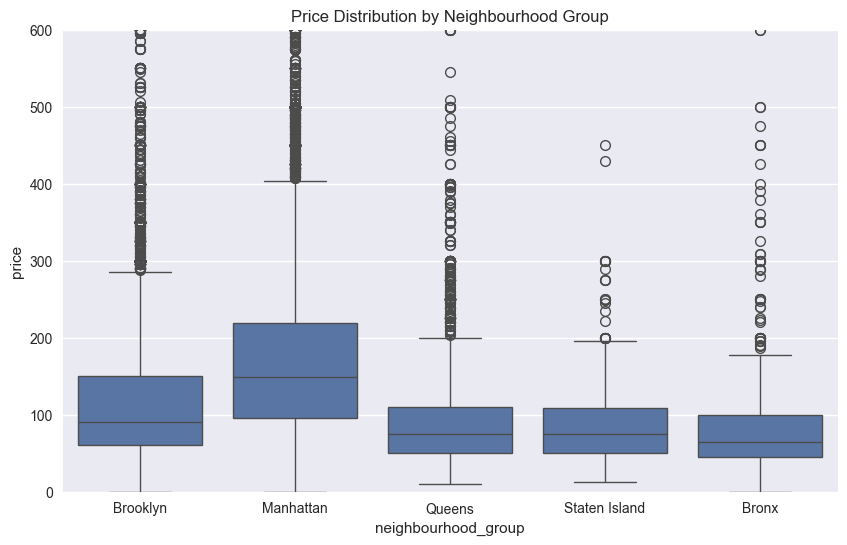

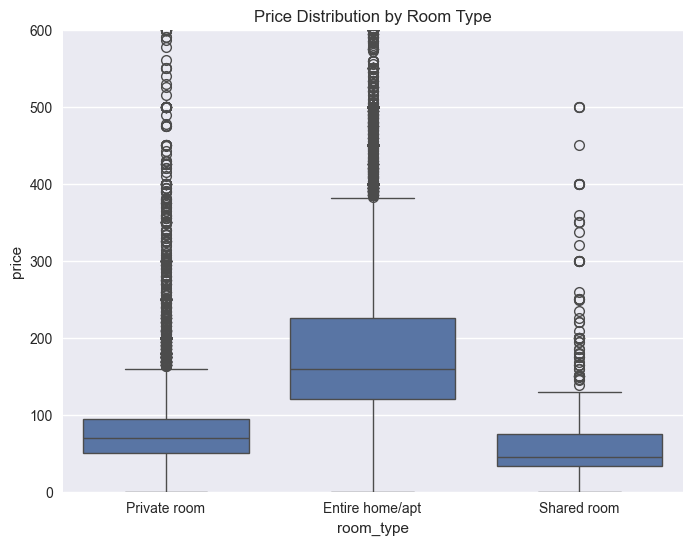

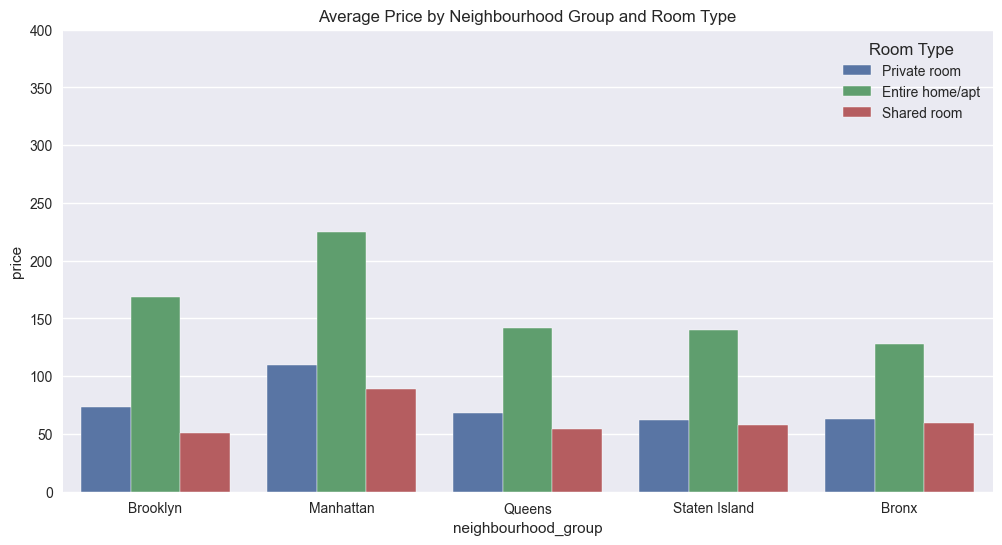

In [27]:
# --- 1. Boxplot of Price by Neighbourhood Group ---
plt.figure(figsize=(10,6))
sns.boxplot(x="neighbourhood_group", y="price", data=df)
plt.ylim(0, 600)  # limit y-axis for better visualization
plt.title("Price Distribution by Neighbourhood Group")
plt.show()

# --- 2. Boxplot of Price by Room Type ---
plt.figure(figsize=(8,6))
sns.boxplot(x="room_type", y="price", data=df)
plt.ylim(0, 600)
plt.title("Price Distribution by Room Type")
plt.show()

# --- 3. Grouped Barplot (Neighbourhood Group × Room Type) ---
plt.figure(figsize=(12,6))
sns.barplot(x="neighbourhood_group", y="price", hue="room_type", data=df, ci=False)
plt.ylim(0, 400)
plt.title("Average Price by Neighbourhood Group and Room Type")
plt.legend(title="Room Type")
plt.show()

🔎 Step 2.4 – Price Variations Across Neighborhoods and Room Categories

The visualizations above provide detailed insights into how Airbnb prices in NYC vary by room type and neighborhood group:
	1.	Price Distribution by Room Type
	•	Entire home/apartment listings are the most expensive overall, with median prices significantly higher than private or shared rooms.
	•	Private rooms form the mid-range, showing moderate prices but with a wide spread and noticeable outliers.
	•	Shared rooms are the least expensive but still display some extreme outliers, suggesting a few listings priced disproportionately high compared to the typical shared accommodation.
	2.	Average Price by Neighborhood and Room Type
	•	Manhattan clearly stands out as the costliest borough across all room types, with entire homes/apartments commanding the highest prices (average > $200).
	•	Brooklyn follows as the second most expensive area, especially for entire homes, while still offering relatively affordable private and shared rooms.
	•	Queens, Bronx, and Staten Island generally have lower average prices, with shared and private rooms clustering in a much lower range.
	•	This trend highlights location as the dominant factor in determining pricing, with room type adding another layer of variation.
	3.	Price Distribution by Neighborhood Group (Boxplots)
	•	Manhattan and Brooklyn not only have higher medians but also wider spreads, reflecting a mix of budget options and luxury rentals.
	•	Queens and Staten Island show tighter distributions, indicating more consistency in pricing.
	•	Bronx remains the most affordable, with a narrower spread and fewer high-end listings.

✅ Key Insights:
	•	Room Type Impact: Entire homes drive higher prices across all neighborhoods, especially in Manhattan and Brooklyn.
	•	Neighborhood Effect: Location is a stronger driver of price variation than room type; Manhattan and Brooklyn listings dominate the high-end market.
	•	Market Segmentation: Bronx, Queens, and Staten Island cater more to budget travelers, while Manhattan is the hub for premium stays.

## 2.5 Correlation Analysis

To gain deeper insights into how numerical features interact with each other, we perform a *correlation analysis*.  
Correlation measures the strength and direction of linear relationships between variables. A value close to *1* or *-1* indicates a strong relationship, while values near *0* suggest weak or no linear correlation.  

In the context of Airbnb NYC data:
- *Price correlations* can reveal which factors drive rental costs.  
- *Reviews and availability correlations* may indicate host engagement or demand trends.  
- Detecting highly correlated variables can also help reduce redundancy when building predictive models.  

We visualize these relationships using a *heatmap*, which provides an intuitive overview of feature interactions.

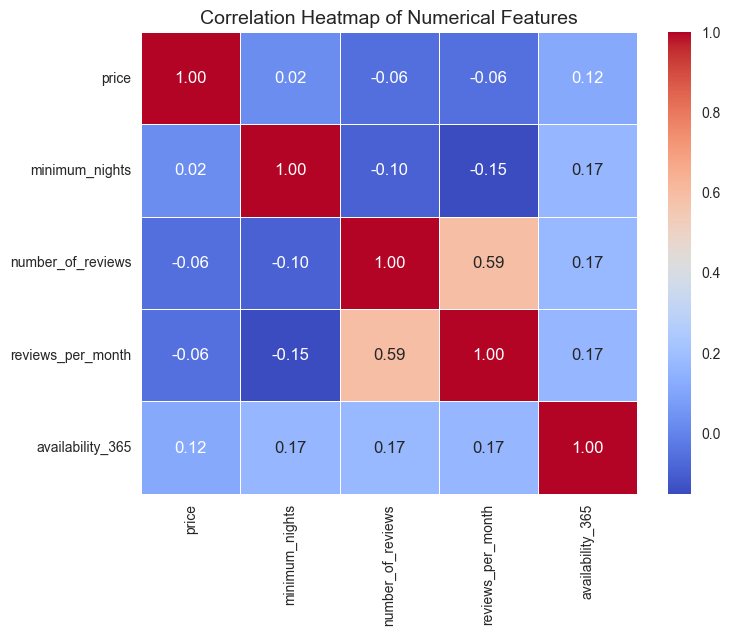

In [28]:
# Select only numerical columns for correlation
num_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

## 2.5 Correlation Analysis

The correlation heatmap provides insights into how numerical variables in the Airbnb NYC dataset are related to each other:

- *Price* shows *very weak correlations* with all other variables. This indicates that rental prices are not strongly driven by features like minimum nights, reviews, or availability. Prices may instead depend more on categorical factors such as neighborhood or room type.  

- *Minimum nights* has weak correlations across the board, but its small positive correlation with availability (0.17) suggests that listings requiring longer stays may also tend to be available for longer periods throughout the year.  

- *Number of reviews and reviews per month* have a *moderate positive correlation (0.59)*. This is expected, as listings that accumulate more total reviews usually receive them at a faster monthly rate.  

- *Availability (availability_365)* shows weak positive correlations (≈0.17) with several variables, suggesting some relationship between host activity and exposure to reviews, but not a strong driver of demand.  

### Key Takeaways
1. *Price dynamics* are not strongly explained by numerical variables alone — other categorical attributes such as location and room type are likely more influential.  
2. *Review patterns* highlight consistency: hosts with many total reviews tend to receive more frequent feedback, reflecting sustained demand.  
3. *Availability* appears somewhat linked with host behavior but is not a dominant factor in shaping prices or reviews.  

This analysis indicates that to better understand pricing strategies or demand, we need to incorporate *categorical factors* and potentially external features (e.g., seasonality or local demand drivers).

### 2.6 Spatial Analysis of Listings

Location is a critical factor in Airbnb pricing and demand.  
In this step, we analyze the *geographical distribution of listings* across New York City using latitude and longitude coordinates.  

Goals:  
1. Visualize how listings are spread across different neighborhoods.  
2. Detect potential *clusters of high-density areas* (e.g., Manhattan, Brooklyn).  
3. Examine whether *price patterns* vary significantly with location.  

By plotting listings on a scatter plot (latitude vs. longitude), colored by price or room type, we can uncover spatial trends and highlight which areas are more expensive or more active in terms of Airbnb supply.

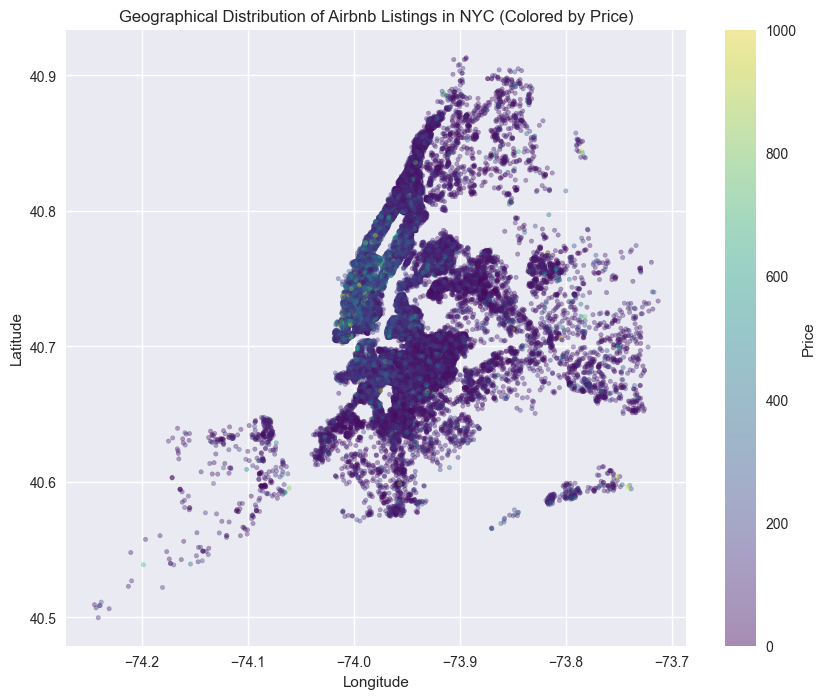

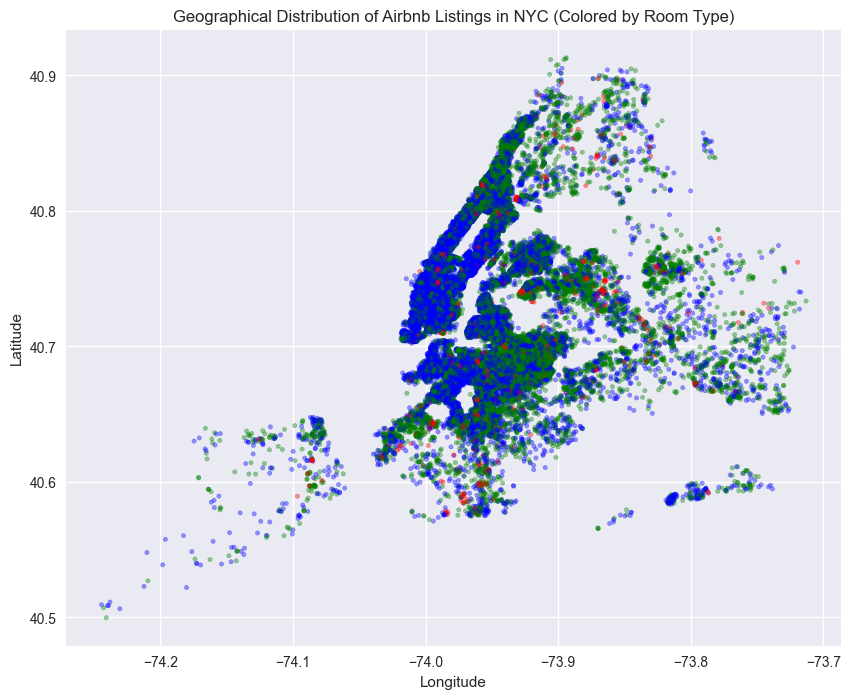

In [29]:
# Scatter plot of listings by location, colored by price
plt.figure(figsize=(10, 8))
plt.scatter(
    df['longitude'], df['latitude'],
    c=df['price'], cmap='viridis', alpha=0.4, s=10
)
plt.colorbar(label='Price')
plt.title("Geographical Distribution of Airbnb Listings in NYC (Colored by Price)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Scatter plot of listings by location, colored by room type
plt.figure(figsize=(10, 8))
colors = {'Entire home/apt': 'blue', 'Private room': 'green', 'Shared room': 'red'}
plt.scatter(
    df['longitude'], df['latitude'],
    c=df['room_type'].map(colors), alpha=0.4, s=10
)
plt.title("Geographical Distribution of Airbnb Listings in NYC (Colored by Room Type)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

🔎 Step 2.6 – Geographical Analysis of Listings

The geographical visualizations provide powerful insights into the spatial distribution of Airbnb listings across New York City. Let’s analyze both plots:

⸻

1. Geographical Distribution by Room Type
	•	Entire home/apartment listings (blue) are heavily concentrated in Manhattan and Brooklyn, aligning with the popularity of these boroughs for both short-term rentals and tourism.
	•	Private rooms (green) are more evenly distributed across all boroughs, suggesting affordability-driven demand where full apartments may not be viable.
	•	Shared rooms (red) are very limited and appear sparsely across the city. This reinforces earlier findings (Step 2.2) that shared rooms are the least common accommodation type.

📌 Insight: Tourists prefer entire apartments in central locations, while private rooms fill the gap in less expensive or more residential areas.

⸻

2. Geographical Distribution by Price
	•	Higher prices (yellow/green dots) are concentrated in Manhattan, particularly around downtown and midtown areas (e.g., Times Square, Soho).
	•	Premium-priced listings also cluster near Brooklyn waterfronts (Williamsburg, Dumbo) and some Queens neighborhoods near Manhattan.
	•	Listings in outer boroughs (Bronx, Staten Island) are generally more affordable, indicated by the dominance of purple dots (lower prices).

📌 Insight: Price distribution reflects the economic geography of NYC. Tourist hotspots and central districts command significantly higher nightly rates, while peripheral areas cater to budget-conscious travelers.

⸻

✅ Conclusion for Step 2.6
The geographical analysis confirms strong spatial clustering patterns:
	•	Manhattan and prime parts of Brooklyn dominate both in volume and price level.
	•	Private rooms help spread listings to less central neighborhoods.
	•	Affordability gradients are clear — as distance increases from Manhattan, average prices drop.

📊 Summary of Exploratory Data Analysis (Step 2 – 2.6)

The Exploratory Data Analysis (EDA) provided valuable insights into the Airbnb listings across New York City. By systematically analyzing numerical, categorical, behavioral, pricing, and geographical dimensions, we uncovered several important trends:
	1.	Distribution of Numerical Variables (2.1):
	•	Prices are heavily right-skewed, with the majority of listings under $200 per night.
	•	Minimum nights and reviews per month also showed strong skewness, highlighting the presence of unusual or extreme cases.
	•	Availability data revealed that many listings are either never available or available year-round.
	2.	Categorical Features (2.2):
	•	Most listings are concentrated in Manhattan and Brooklyn, which dominate the NYC Airbnb market.
	•	The most common room types are Entire home/apartment and Private room, while shared rooms are relatively rare.
	3.	Host Behavior & Availability Trends (2.3):
	•	The majority of hosts manage only one or two listings, but a few “power hosts” own 10+ listings.
	•	Availability patterns are polarized: many listings are either rarely available (0–30 days) or fully available (365 days).
	•	Availability also varies across room types, with shared rooms generally having higher availability compared to private or entire homes.
	4.	Price Variations by Room Type & Neighborhood (2.4):
	•	Entire homes/apartments have the highest median prices, followed by private rooms, while shared rooms remain the most affordable.
	•	Manhattan consistently commands the highest prices across all room categories, while Bronx and Staten Island offer more budget-friendly options.
	5.	Correlation Analysis (2.5):
	•	Numerical features showed generally weak correlations with price, indicating that price is influenced by more complex factors (e.g., location, room type).
	•	A moderate positive correlation exists between number of reviews and reviews per month, which is intuitive.
	6.	Geographical Analysis (2.6):
	•	Listings are densely clustered in Manhattan, particularly in central neighborhoods, reflecting NYC’s tourism hotspots.
	•	High-priced listings are concentrated in central Manhattan and parts of Brooklyn.
	•	Room types show distinct spatial patterns: entire apartments dominate Manhattan, while private rooms are more evenly distributed across boroughs.

⸻

✅ Key Takeaway:
The NYC Airbnb market is highly concentrated in Manhattan and Brooklyn, where entire apartments dominate and prices are significantly higher. Host behavior shows a mix of casual single-listing hosts and professional multi-listing hosts. Availability is polarized, with many listings either always available or never available. Finally, location remains the strongest driver of price, emphasizing the importance of geographical context in understanding Airbnb dynamics.

## 3. Insights & Future Work  

After completing the *Data Cleaning* and *Exploratory Data Analysis (EDA)* stages, we now move to the final step of this project: *Insights & Future Work*.  
The goal of this stage is two-fold:  

1. *Provide actionable insights* about Airbnb listings in New York City, based on the trends, patterns, and anomalies uncovered during the EDA process. These insights can help hosts, travelers, and policymakers make informed decisions regarding pricing, availability, and investment opportunities.  

2. *Lay the groundwork for predictive modeling* and advanced analytics. With a cleaned and well-explored dataset, we are now in a strong position to design and train models that can predict outcomes such as listing prices, demand forecasts, or host performance.  

This section will therefore focus on:  
- Highlighting the *key findings* from the dataset (e.g., which neighborhoods are most expensive, which room types dominate the market, how host behavior varies).  
- Suggesting *practical implications* of these insights for stakeholders.  
- Outlining possible directions for *future machine learning applications*, such as price prediction or occupancy forecasting.  

By bridging descriptive insights with predictive potential, this stage connects the *current understanding of NYC’s Airbnb market* to *future opportunities for data-driven decision making*.

### 3.1 Actionable Insights  

Based on the results of our exploratory data analysis (EDA), several *actionable insights* can be derived from the NYC Airbnb dataset:  

1. *Neighborhood Dynamics*  
   - Manhattan and Brooklyn dominate the market, together hosting more than 80% of all listings.  
   - Manhattan, in particular, exhibits significantly higher prices, making it a premium market compared to other boroughs.  
   - Staten Island and Bronx, while less represented, provide more affordable alternatives.  

2. *Room Type Preferences*  
   - Entire home/apartment listings account for the majority of revenue potential, given their higher prices.  
   - Private rooms remain highly popular, offering affordability and accessibility to a larger customer base.  
   - Shared rooms are the least common and cater to a niche audience.  

3. *Host Behavior*  
   - The majority of hosts manage a single property, but a small group of multi-listing hosts control a disproportionately large share of listings.  
   - This trend suggests the presence of professional operators within the Airbnb market in NYC.  

4. *Availability Trends*  
   - Many listings are either available year-round (365 days) or have very limited availability (close to 0 days), indicating two distinct host strategies:  
     - Professional hosts maximizing occupancy.  
     - Casual hosts offering their homes occasionally.  

5. *Pricing Patterns*  
   - Extreme outliers (e.g., very high nightly rates) exist but are rare. Most prices cluster between $50–$200 per night.  
   - Manhattan consistently has the highest average prices, particularly for entire homes/apartments.  

These insights highlight not only the *market dynamics* of Airbnb in NYC but also the *opportunities for hosts and travelers*.  
- Hosts can tailor their strategies depending on the borough and room type.  
- Travelers can balance affordability with neighborhood preference.  
- Policymakers can monitor the concentration of multi-listing hosts and price disparities across neighborhoods.

In [30]:
# Average price by neighbourhood group
avg_price_by_neighbourhood = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
print("Average price by neighbourhood group:\n", avg_price_by_neighbourhood)

# Count of room types
room_type_counts = df['room_type'].value_counts()
print("\nRoom type distribution:\n", room_type_counts)

# Listings per host
host_listings = df['calculated_host_listings_count'].value_counts().head()
print("\nDistribution of number of listings per host (top 5):\n", host_listings)

# Availability extremes
availability_counts = df['availability_365'].value_counts().head()
print("\nMost common availability values:\n", availability_counts)

Average price by neighbourhood group:
 neighbourhood_group
Manhattan        178.934413
Brooklyn         117.819298
Staten Island     98.584906
Queens            94.983021
Bronx             85.283486
Name: price, dtype: float64

Room type distribution:
 room_type
Entire home/apt    25209
Private room       22276
Shared room         1157
Name: count, dtype: int64

Distribution of number of listings per host (top 5):
 calculated_host_listings_count
1    32124
2     6635
3     2847
4     1436
5      841
Name: count, dtype: int64

Most common availability values:
 availability_365
0      17466
365     1251
364      479
1        408
89       358
Name: count, dtype: int64


### 3.1 Visualizing Key Insights from Airbnb Listings

To better understand the Airbnb market in NYC, we visualize three important aspects:

1. **Average Price by Neighbourhood Group**  
   Helps us compare pricing trends across the five boroughs of New York City.  

2. **Distribution of Room Types**  
   Shows which types of accommodations dominate the market (Entire home/apt, Private room, Shared room).  

3. **Listings per Host**  
   Provides insights into whether hosts typically list a single property or manage multiple listings, which may indicate professional hosting behavior.


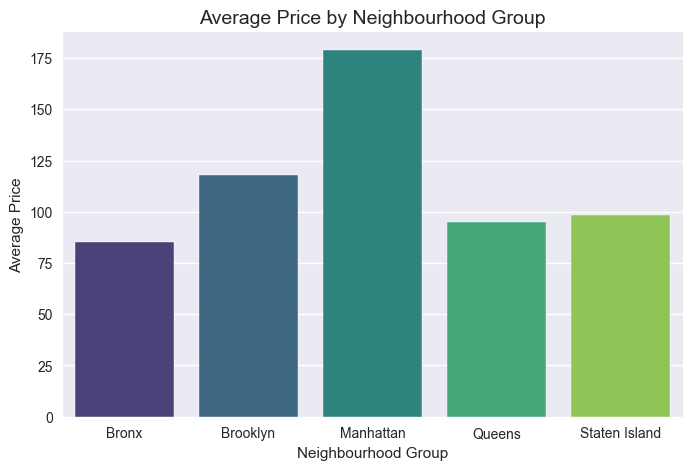

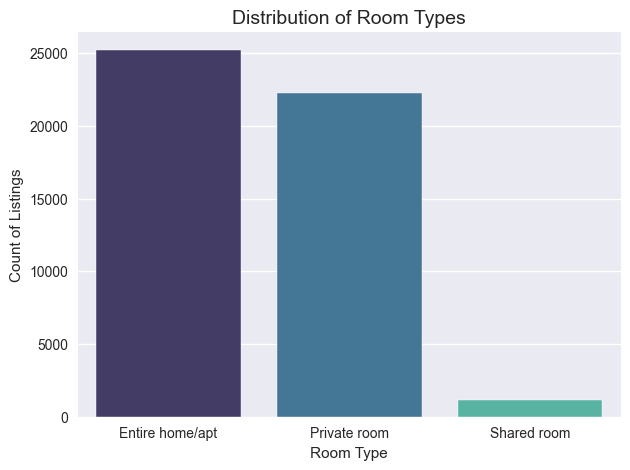

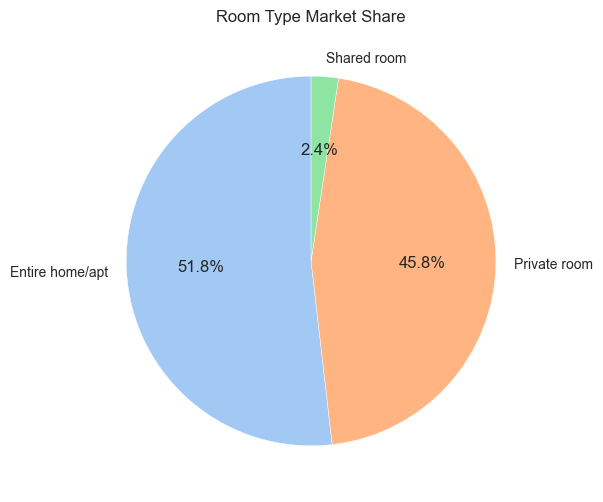

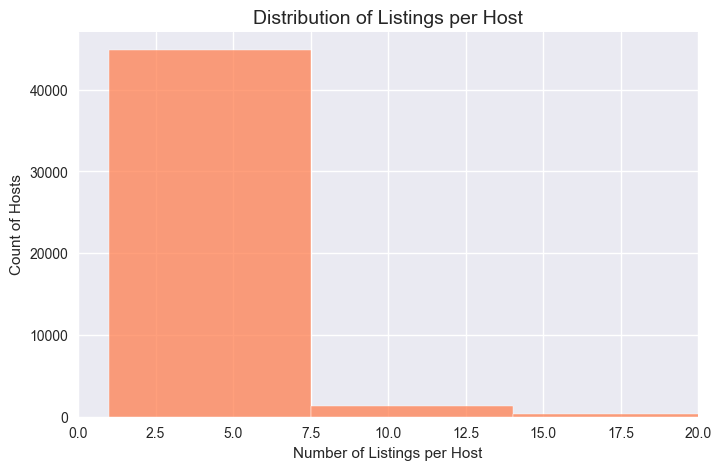

In [31]:
# 1. Average Price by Neighbourhood Group
plt.figure(figsize=(8,5))
sns.barplot(x=df.groupby("neighbourhood_group")["price"].mean().index,
            y=df.groupby("neighbourhood_group")["price"].mean().values,
            palette="viridis")
plt.title("Average Price by Neighbourhood Group", fontsize=14)
plt.ylabel("Average Price")
plt.xlabel("Neighbourhood Group")
plt.show()

# 2. Distribution of Room Types
plt.figure(figsize=(7,5))
room_counts = df['room_type'].value_counts()
sns.barplot(x=room_counts.index, y=room_counts.values, palette="mako")
plt.title("Distribution of Room Types", fontsize=14)
plt.ylabel("Count of Listings")
plt.xlabel("Room Type")
plt.show()

# Optional: Pie chart for room types (extra)
plt.figure(figsize=(6,6))
plt.pie(room_counts, labels=room_counts.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.title("Room Type Market Share")
plt.show()

# 3. Listings per Host
plt.figure(figsize=(8,5))
sns.histplot(df['calculated_host_listings_count'], bins=50, kde=False, color="coral")
plt.title("Distribution of Listings per Host", fontsize=14)
plt.xlabel("Number of Listings per Host")
plt.ylabel("Count of Hosts")
plt.xlim(0,20)  # Focus on small counts for clarity
plt.show()


🔎 Step 3.1 Insights into Neighborhoods, Room Types, and Hosts

The analysis of Airbnb listings in New York City reveals several important insights regarding neighborhood pricing, room type distribution, and host activity:
	1.	Average Price by Neighborhood Group
	•	Manhattan clearly stands out with the highest average price ($179), more than double the Bronx ($85), which is the most affordable borough.
	•	Brooklyn also shows relatively high prices ($118), while Queens ($95) and Staten Island (~$99) remain more affordable alternatives.
	•	These results highlight the premium positioning of Manhattan, where demand and central location drive up prices.
	2.	Room Type Distribution
	•	The market is dominated by Entire home/apartment (51.8%) and Private rooms (45.8%), together accounting for nearly the entire supply.
	•	Shared rooms (2.4%) are almost negligible, showing low demand or host willingness to offer them.
	•	This indicates that Airbnb in NYC primarily caters to guests seeking more privacy and exclusivity.
	3.	Listings per Host
	•	A large majority of hosts list only one property, showing a strong presence of individual or casual hosts.
	•	However, there are also “power hosts” with multiple listings, though they represent a smaller share. This suggests a dual market structure: casual renters and professional operators.
	4.	Distribution of Room Types (Bar Chart)
	•	Entire homes/apartments and private rooms dominate the market, reinforcing the insight from the pie chart.
	•	The sharp contrast with shared rooms underscores the fact that Airbnb in NYC is less about budget travel and more about providing alternatives to traditional hotels.

⸻

Key Takeaways
	•	Manhattan commands the highest prices, reflecting its prime real estate and global demand.
	•	Entire homes/apartments are the most popular choice, positioning Airbnb as a strong competitor to hotels.
	•	The market is a mix of casual individual hosts and professional multi-listing operators, each shaping the supply dynamics differently.
    

### 3.2 Future Work  

While the current analysis provides a comprehensive understanding of Airbnb listings in New York City through data cleaning and exploratory data analysis (EDA), there remain several promising directions for *future work*. These steps can enhance the analytical depth of the project and support actionable decision-making for both stakeholders and researchers.  

#### 1. Predictive Modeling  
- *Price Prediction:*  
  Develop machine learning models (e.g., Linear Regression, Random Forest, Gradient Boosting) to predict nightly prices based on features such as neighborhood, room type, availability, and host behavior.  
- *Occupancy Forecasting:*  
  Use time-series or classification models to forecast demand and occupancy rates. This would help hosts optimize pricing strategies and availability.  

#### 2. Advanced Insights into Market Dynamics  
- *Temporal Analysis:*  
  Analyze how demand and prices fluctuate over time (e.g., seasonality, holidays, weekends vs. weekdays).  
- *Host Behavior Profiling:*  
  Differentiate between casual single-listing hosts and professional multi-listing hosts, and study their distinct impacts on the market.  
- *Customer Segmentation:*  
  Apply clustering techniques (e.g., K-means, DBSCAN) to segment listings or customers based on behavior, pricing, and availability.  

#### 3. Geospatial and Urban Planning Applications  
- *Fine-Grained Spatial Analysis:*  
  Extend geospatial visualizations by linking Airbnb data with socioeconomic and demographic datasets to better understand the impact of short-term rentals on local communities.  
- *Policy Implications:*  
  Provide insights to policymakers regarding zoning regulations, rental caps, or neighborhood-specific restrictions by identifying areas with high Airbnb saturation.  

#### 4. Incorporating External Data Sources  
- *Tourism Data:*  
  Combine Airbnb listings with NYC tourism statistics to assess the relationship between visitor inflow and Airbnb market performance.  
- *Event Data:*  
  Study the impact of major events (e.g., New Year’s Eve, US Open, Fashion Week) on Airbnb pricing and availability.  

---

### 📌 Summary  
The *Future Work* section emphasizes the transition from descriptive insights to predictive analytics. By building on the cleaned and well-analyzed dataset, future steps can involve *machine learning modeling, temporal and spatial analyses, and integration of external datasets. These directions will not only enrich our understanding of the NYC Airbnb ecosystem but also create practical tools for **hosts, travelers, policymakers, and investors* to make informed, data-driven decisions.

## Final Conclusion  

This project provided a structured approach to analyzing the *NYC Airbnb dataset, moving systematically through three major stages: **Data Cleaning, Exploratory Data Analysis (EDA), and Insights & Future Work*.  

1. *Data Cleaning*  
   - Addressed missing values, corrected inconsistencies, and ensured proper data types.  
   - Detected and handled outliers in critical variables such as price, minimum_nights, and reviews_per_month.  
   - Result: A cleaner, more reliable dataset with realistic values, ready for robust analysis.  

2. *Exploratory Data Analysis (EDA)*  
   - Explored *numerical distributions* (price, minimum nights, reviews, availability) and identified skewed patterns.  
   - Analyzed *categorical features* (room types and neighborhood groups), showing that Manhattan and Brooklyn dominate the market.  
   - Investigated *host behavior and availability trends*, highlighting the differences between casual and professional hosts.  
   - Studied *price variations* across neighborhoods and room types, confirming Manhattan’s premium pricing compared to other boroughs.  
   - Conducted *correlation analysis*, which revealed weak relationships between most variables, except for a moderate link between number of reviews and reviews per month.  
   - Geospatial analysis mapped the distribution of listings across NYC, showing clustering in central and high-demand areas.  

3. *Insights & Future Work*  
   - Derived actionable insights: Manhattan commands the highest prices, entire homes/apartments dominate the market, and most hosts manage a single listing.  
   - Suggested future directions: predictive modeling (price prediction, occupancy forecasting), advanced spatial/temporal analysis, customer segmentation, and policy implications.  

### 📌 Overall Takeaway  
Through systematic data cleaning and comprehensive exploratory analysis, we gained *valuable insights into the dynamics of Airbnb in NYC, including pricing trends, host behavior, and market structure. The study not only enhances understanding of the current market but also establishes a strong foundation for **future predictive modeling and advanced analytics. By bridging descriptive insights with predictive potential, this project demonstrates the power of data science in shaping smarter decisions for **hosts, policymakers, and travelers alike*.